I have used Jupyter notebooks for **EG-247 Signals and Systems** for a number of reasons:

1. I can easily produce maths-rich textbook quality notes using the Markdown system provided for documentation blocks.
1. I can generate a slide-show from my notes but also print them as PDF files for your convenience.
1. I can interweave live coding examples with my notes and execute and change these examples in a live classroom.
1. ... more interestingly, you can take the notebooks and experiment with the computing examples yourself!

However, to fully access all the examples that have been provided as Jupyter notebooks for EG-247 you will need to install both MATLAB (I used MATLAB 2019a) and Python 3 (I used Anaconda 3) and this is something of a technical challenge.

The installation of Anaconda 3 (which includes Jupyter Notebook) and MATLAB is [described elsewhere](https://conda.io/docs/user-guide/install/index.html#) but must be done before you can open and execute this notebook. 

Assuming that you *have* installed Anaconda 3, you can [download](https://github.com/cpjobling/EG-247-Resources/blob/master/setup/setup.ipynb) and open this notebook using the command:

```
jupyter notebook setup.ibynb
```

Alternatively, you can use the **Anaconda Navigator** to launch a Jupyter Notebook and then navigate to the `setup.ipynb` file.

**Note** for Windows users, you need to start jupyter as an Administrator.  

## Advanced users

You may prefer to use the python environments and the command line, in which case, refer to [Advanced Settings](advanced-setup.md).

## About this notebook

A Jupyter notebook is a combination of documentation and code cells. It is both a sequence of commands (in this case written in Python) that can be executed in sequence and a record of that execution. This notebook documents the process of installing the MATLAB kernel for Jupyter. 

You should be able to run each code cell in turn without errors. To execute code in a Jupyter notebook, select a code cell and press the run button or type `Shift-Enter`. The next cell will automatically be selected.

Alternatively you can simply run the whole notebook by selecting the `Cell->Run All` command from the menu.

## Set up anaconda environment

## Test Base Setup

The following Python code (adapted from the script [soton-test-python-installation.py](https://fangohr.github.io/blog/code/python/soton-test-python-installation.py) [1]) can be executed to report whether particular python packages are available on the system. 

First we define some tests.

In [1]:
import math
import os
import sys


def test_is_python_35():
    major = sys.version_info.major
    minor = sys.version_info.minor
    if major == 3:
        pass 
    else:
        print("You are running Python {}, but we need Python {}.".format(major, 3))
        print("Download and install the Anaconda distribution for Python 3.")
        print("Stopping here.")

        # Let's stop here
        sys.exit(1)
        return None
        # assert major == 3, "Stopping here - we need Python 3."

    if minor >= 5:
        print("Testing Python version-> py{}.{} OK".format(major, minor))
    else:
        print("Warning: You should be running Python 3.5 or newer, " +
              "you have Python {}.{}.".format(major, minor))
        
        
def test_numpy():
    try:
        import numpy as np
    except ImportError:
        print("Could not import numpy -> numpy failed")
        return None
    # Simple test
    a = np.arange(0, 100, 1)
    assert np.sum(a) == sum(a)
    print("Testing numpy...      -> numpy OK")


def test_scipy():
    try:
        import scipy
    except ImportError:
        print("Could not import 'scipy' -> scipy failed")
        return None
    # Simple test
    import scipy.integrate
    assert abs(scipy.integrate.quad(lambda x: x * x, 0, 6)[0] - 72.0) < 1e-6
    print("Testing scipy ...     -> scipy OK")


def test_pylab():
    """Actually testing matplotlib, as pylab is part of matplotlib."""
    try:
        import pylab
    except ImportError:
            print("Could not import 'matplotlib/pylab' -> failed")
            return None
    # Creata plot for testing purposes
    xvalues = [i * 0.1 for i in range(100)]
    yvalues = [math.sin(x) for x in xvalues]
    pylab.plot(xvalues, yvalues, "-o", label="sin(x)")
    pylab.legend()
    pylab.xlabel('x')
    testfilename='pylab-testfigure.png'

    # check that file does not exist yet:
    if os.path.exists(testfilename):
        print("Skipping plotting to file as file {} exists already."\
            .format(testfilename))
    else:
        # Write plot to file
        pylab.savefig(testfilename)
        # Then check that file exists
        assert os.path.exists(testfilename)
        print("Testing matplotlib... -> pylab OK")
        os.remove(testfilename)


def test_sympy():
    try:
        import sympy
    except ImportError:
            print("Could not import 'sympy' -> fail")
            return None
    # simple test
    x = sympy.Symbol('x')
    my_f = x ** 2
    assert sympy.diff(my_f,x) == 2 * x
    print("Testing sympy         -> sympy OK")


def test_pytest():
    try:
        import pytest
    except ImportError:
            print("Could not import 'pytest' -> fail")
            return None
    print("Testing pytest        -> pytest OK")

The we run the tests to test that we have all the packages we need. If we have installed Anaconda 3 correctly, there should be no errors.

Running using Python 3.7.6 (default, Jan  8 2020, 19:59:22) 
[GCC 7.3.0]
Testing Python version-> py3.7 OK
Testing numpy...      -> numpy OK
Testing scipy ...     -> scipy OK
Testing matplotlib... -> pylab OK
Testing sympy         -> sympy OK
Testing pytest        -> pytest OK


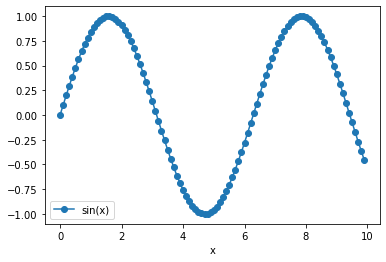

In [2]:
print("Running using Python {}".format(sys.version))
test_is_python_35()
test_numpy()
test_scipy()
test_pylab()
test_sympy()
test_pytest()

The remaining installation instructions are adapted from [2].

## Python-MATLAB Bridge

To install this, we first have to install MATLAB. I'm assuming that this has been done and you have MATLAB 2017b or greater installed.

Now we install the Python-MATLAB bridge. 

Here we've adapted the instructions given in the official Matlab documentation [MATLAB API for Python](https://uk.mathworks.com/help/matlab/matlab-engine-for-python.html).

I ran this on my Mac. The equivalent Windows and Linux commands are given in the comments.

In [3]:
# Mac OS: 
matlabroot='/Applications/MATLAB_R2019a.app'
# Windows
# matlabroot='C:\Program Files\MATLAB\R2019a'
# Linux: matlabroot='/usr/local/matlab/R2019a'

In [4]:
# Unix
%cd {matlabroot}/extern/engines/python
# Windows: 
#%cd {matlabroot}\extern\engines\python

[Errno 2] No such file or directory: '/Applications/MATLAB_R2019a.app/extern/engines/python'
/mnt/c/Users/Chris/OneDrive - Swansea University/Teaching/Courses/EG-247 Signals and Systems/eg-247-textbook/content/setup


In [ ]:
# Ubuntu running in Windows using WSL
matlabroot='/mnt/c/Program\ Files/MATLAB/R2019a'
%cd {matlabroot}/extern/engines/python

### Install MATLAB Engine

**Notes**

* On windows you have to do this step as an admin user
  * Open the anaconda prompt as administrator.
  * Copy result of previous command
  * type `cd` then paste what you've just copied and type `Enter`
  * Now copy `python setup.py install`, paste and type `Enter`
* If your MATLAB is 2016b, or older, you may need to install an earlier version of Python and repeat the steps above.

In [ ]:
python setup.py install

## Test Python can now communicate with MATLAB

First start a MATLAB session

In [7]:
import matlab.engine
eng = matlab.engine.start_matlab()

ModuleNotFoundError: No module named 'matlab'

Then connect to the session

In [ ]:
eng = matlab.engine.connect_matlab()

Now compute something. Here's a 10x10 magic square

In [ ]:
m = eng.magic(10);

In [ ]:
print(m)

Close the session

In [ ]:
eng.quit()

## MATLAB Kernel for Jupyter

Finally we install the `matlab_kernel` using the instructions given here: [Calysto/matlab_kernel](https://github.com/Calysto/matlab_kernel/blob/master/README.rst).

In [ ]:
!pip install matlab_kernel

To check that the `malab_kernel` is properly installed do the following.

1. Save this notebook `File->Save`.
1. Select `Kernel->Shutdown` from the notebook menu.
1. Close the browser window.
1. Restart the Jupiter Notebook, as you did at the start, then return here:

```
jupyter notebook setup.ipynb --debug

```

## Test MATLAB Kernel

From the `Kernel` menu you should be able to navigate to `Change kernel` and `Matlab` should now be listed (Fig. 1).

![Figure 1: The Kernel Menu](fig1.png)
Figure 1: The Kernel Menu

Go ahead and switch to the MATLAB kernel.

If all is well, you should see the Kernel indicator (top right) change to 'Matlab' (Fig. 2)

![Figure 2: Matlab kernel indicator](fig2.png)
Figure 2: The MATLAB kernel indicator

You should now be able to execute the MATLAB `magic(10)` function again and get the result shown:

```matlab
magic(10)

ans =

    92    99     1     8    15    67    74    51    58    40
    98    80     7    14    16    73    55    57    64    41
     4    81    88    20    22    54    56    63    70    47
    85    87    19    21     3    60    62    69    71    28
    86    93    25     2     9    61    68    75    52    34
    17    24    76    83    90    42    49    26    33    65
    23     5    82    89    91    48    30    32    39    66
    79     6    13    95    97    29    31    38    45    72
    10    12    94    96    78    35    37    44    46    53
    11    18   100    77    84    36    43    50    27    59

```

Go ahead and execute the next code cell.

In [ ]:
magic(10)

If you wish to further test the Matlab interface, download this file from the `Calysto/matlab_kernel` repository [matlab_kernel.ipynb](https://github.com/Calysto/matlab_kernel/blob/master/matlab_kernel.ipynb), open it in Jupyter and run the whole notebook.

**Note** There is a reported bug ([kernel keeps crashing #101](https://github.com/Calysto/matlab_kernel/issues/101)) with the latest version of `matlab_kernel` (0.15.1) and MATLAB R2017b on a Mac. The kernel crashes randomly. I have experienced this issue myself. The problem is reported to not affect windows but I have not yet independently confirmed this. I will monitor the situation and update this page if a fix is released.

If *you* have any problems, send me a message through the Teams page for the EG-247 Course.

## For More Information on Jupyter

To learn more about Jupyter notebooks, the key resource is the [Jupyter Project site](https://jupyter.org) itself. There, under the documentation section, you will find everything you need to fully understand Jupyter. However, it's not arranged in a way that is useful for a beginner! 

For a quick introduction, I particularly recommend Corey Schafer's YouTube tutorial: https://youtu.be/HW29067qVWk.

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/HW29067qVWk" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## Jupyter Noteboooks versus MATLAB Live Scripts 

Both Jupyter and MATLAB Live Script trace their origins -- or at least their inspiration -- to the <a href="https://en.wikipedia.org/wiki/Wolfram_Mathematica_(software)#The_Notebook_interface">Mathematica Notebook interface</a>. All allow the mixing of code with output, the running of code in sections, and the ability to add formatted text, images, and equations to tell a story and provide a repeatable record of a computation. 

The Mathworks claims some [advantages for the MATLAB Live Script interface](https://uk.mathworks.com/matlabcentral/answers/329935-jupyter-notebook-vs-live-scripts#answer_259207) due to its close integration with the MATLAB desktop and the new MATLAB Online product. Other teachers have also advocated the use of Live Script in teaching, e.g. [Teaching with Matlab Live Scripts](http://bastibe.de/2016-06-15-matlab-live-scripts.html). The main issue though is that MATLAB is an expensive, licensed product. It's free to use while you are a student or a teacher at Swansea University. It is extremely expensive once you graduate!

For me, the main advantage of Jupyter notebooks is that it is language independent, well supported, open source and free! It also has some features, mentioned at the top of this document, that make it particularly attractive as a support tool for the teaching on this course. 

That said, we will be using MATLAB throughout this course and MATLAB Live Scripts in the Labs for this module.

## References

1. Fangohr, Prof Hans, *Installation of Python, Spyder, Numpy, Sympy, Scipy, Pytest, Matplotlib via Anaconda*, University of Southampton, 20116. Available from: https://fangohr.github.io/blog/installation-of-python-spyder-numpy-sympy-scipy-pytest-matplotlib-via-anaconda.html.

1. Blank, Doug, Silvester, Steven and Lee, Antony, *`Calysto/matlab_kernel` README*, Calysto, 2017. Available from GitHub: https://github.com/Calysto/matlab_kernel/blob/master/README.rst.